In [137]:
import pandas as pd
from rdkit.Chem import Descriptors
from rdkit import Chem
from collections import defaultdict
from matplotlib import pyplot as plt

In [61]:
data = pd.read_csv('/Users/zhujiayuan/Downloads/activity_data.csv')

In [62]:
data.head(5)

,SMILES,CID,canonical_CID,r_inhibition_at_20_uM,r_inhibition_at_50_uM,r_avg_IC50,f_inhibition_at_20_uM,f_inhibition_at_50_uM,f_avg_IC50,f_avg_pIC50,relative_solubility_at_20_uM,relative_solubility_at_100_uM,trypsin_IC50,NMR_std_ratio,acrylamide,chloroacetamide,series,frag_id
0,CCNC(=O)CN1CC2(CCN(c3cncc4ccccc34)C2=O)c2cc(Cl...,LUO-POS-e1dab717-11,LUO-POS-e1dab717-11,NaN,NaN,NaN,NaN,NaN,0.275118,NaN,NaN,NaN,NaN,NaN,False,False,3-aminopyridine-like,NaN
1,O=C(CN1CC2(CCN(c3cncc4ccccc34)C2=O)c2cc(Cl)ccc...,LUO-POS-e1dab717-12,LUO-POS-e1dab717-12,NaN,NaN,NaN,NaN,NaN,0.202767,NaN,NaN,NaN,NaN,NaN,False,False,3-aminopyridine-like,NaN
2,CNC(=O)C1(N2C[C@]3(CCN(c4cncc5ccccc45)C3=O)c3c...,MAT-POS-e48723dc-1,MAT-POS-e48723dc-1,NaN,NaN,NaN,NaN,NaN,55.453947,NaN,NaN,NaN,NaN,NaN,False,False,Ugi,NaN
3,CNC(=O)C1(N2C[C@@]3(CCN(c4cncc5ccccc45)C3=O)c3...,MAT-POS-e48723dc-2,MAT-POS-e48723dc-2,NaN,NaN,NaN,NaN,NaN,0.050000,NaN,NaN,NaN,NaN,NaN,False,False,Ugi,NaN
4,CNC(=O)CN1C[C@@]2(CCN(c3cncc4ccccc34)C2=O)c2cc...,LUO-POS-9931618f-2,LUO-POS-9931618f-2,NaN,NaN,NaN,NaN,NaN,0.052757,NaN,NaN,NaN,NaN,NaN,False,False,Ugi,NaN


In [63]:
list(data.columns)

['SMILES',
 'CID',
 'canonical_CID',
 'r_inhibition_at_20_uM',
 'r_inhibition_at_50_uM',
 'r_avg_IC50',
 'f_inhibition_at_20_uM',
 'f_inhibition_at_50_uM',
 'f_avg_IC50',
 'f_avg_pIC50',
 'relative_solubility_at_20_uM',
 'relative_solubility_at_100_uM',
 'trypsin_IC50',
 'NMR_std_ratio',
 'acrylamide',
 'chloroacetamide',
 'series',
 'frag_id']

In [84]:
subdata = data[['SMILES', 'CID', 'f_avg_IC50']]
subdata #(2062,3)

,SMILES,CID,f_avg_IC50
0,CCNC(=O)CN1CC2(CCN(c3cncc4ccccc34)C2=O)c2cc(Cl...,LUO-POS-e1dab717-11,0.275118
1,O=C(CN1CC2(CCN(c3cncc4ccccc34)C2=O)c2cc(Cl)ccc...,LUO-POS-e1dab717-12,0.202767
2,CNC(=O)C1(N2C[C@]3(CCN(c4cncc5ccccc45)C3=O)c3c...,MAT-POS-e48723dc-1,55.453947
3,CNC(=O)C1(N2C[C@@]3(CCN(c4cncc5ccccc45)C3=O)c3...,MAT-POS-e48723dc-2,0.050000
4,CNC(=O)CN1C[C@@]2(CCN(c3cncc4ccccc34)C2=O)c2cc...,LUO-POS-9931618f-2,0.052757
...,...,...,...
2057,N#Cc1cc(Cl)cc(NC(=O)Nc2cccnc2)c1,WAR-XCH-eb7b662f-2,99.010000
2058,N#Cc1cccc(NC(=O)Nc2cncc(N)c2)c1,DAR-DIA-23aa0b97-8,54.272964
2059,N#Cc1cccc(NC(=O)Nc2c[nH]c3ncccc23)c1,DAR-DIA-23aa0b97-11,63.554925
2060,N#Cc1cccc(NC(=O)Cc2cncc3ccccc23)c1,DAR-DIA-23aa0b97-19,26.719515


In [80]:
print(subdata['SMILES'].isnull().values.any())
print(subdata['CID'].isnull().values.any())
print(subdata['f_avg_IC50'].isnull().values.any())

False
False
True


In [81]:
subdata['f_avg_IC50'].isnull().sum()

136

In [82]:
is_NaN = subdata.isnull()
row_has_NaN = is_NaN.any(axis=1)
rows_with_NaN = subdata[row_has_NaN]
rows_with_NaN

,SMILES,CID,f_avg_IC50
985,O=C(C[C@@]1(C(=O)Nc2cncc3ccccc23)CCOc2ccc(Cl)c...,ALP-UNI-3496895b-8,NaN
1107,O=C(C[C@@]1(C(=O)Nc2cncc3ccccc23)CCOc2ccc(Cl)c...,KAD-UNI-8a629cb0-21,NaN
1255,O=C(Nc1cncc2cnccc12)[C@H]1CCOc2ccc(Cl)cc21,ALP-POS-ce760d3f-2,NaN
1324,COc1cc(Cl)cc2c1OCC[C@@H]2C(=O)Nc1cncc2ccccc12,MAT-POS-43fe65f4-1,NaN
1343,COc1ccc2c(N)nn(C(=O)C3CCOc4ccc(Cl)cc43)c2c1,ALP-POS-79636100-2,NaN
...,...,...,...
2025,Cc1ccn2c(-c3ccc4[nH]ncc4c3)c(-c3ccc(F)cc3)nc2c1,ALV-UNI-7ff1a6f9-14,NaN
2029,CC1C(O)CCCN1Cc1ccccc1,MAK-UNK-6435e6c2-9,NaN
2038,O=C(CCl)N1CCN(Cc2cccc(Cl)c2)C[C@@H]1Cc1ccccc1,DAN-LON-a5fc619e-10,NaN
2045,CS(=O)(=O)N(CCc1ccccc1)CC1CCN(C(=O)CCl)CC1,DUN-NEW-f8ce3686-25,NaN


In [85]:
subdata = subdata.dropna()
subdata = subdata.reset_index(drop=True)
subdata #(1926, 3)

,SMILES,CID,f_avg_IC50
0,CCNC(=O)CN1CC2(CCN(c3cncc4ccccc34)C2=O)c2cc(Cl...,LUO-POS-e1dab717-11,0.275118
1,O=C(CN1CC2(CCN(c3cncc4ccccc34)C2=O)c2cc(Cl)ccc...,LUO-POS-e1dab717-12,0.202767
2,CNC(=O)C1(N2C[C@]3(CCN(c4cncc5ccccc45)C3=O)c3c...,MAT-POS-e48723dc-1,55.453947
3,CNC(=O)C1(N2C[C@@]3(CCN(c4cncc5ccccc45)C3=O)c3...,MAT-POS-e48723dc-2,0.050000
4,CNC(=O)CN1C[C@@]2(CCN(c3cncc4ccccc34)C2=O)c2cc...,LUO-POS-9931618f-2,0.052757
...,...,...,...
1921,N#Cc1cc(Cl)cc(NC(=O)Nc2cccnc2)c1,WAR-XCH-eb7b662f-2,99.010000
1922,N#Cc1cccc(NC(=O)Nc2cncc(N)c2)c1,DAR-DIA-23aa0b97-8,54.272964
1923,N#Cc1cccc(NC(=O)Nc2c[nH]c3ncccc23)c1,DAR-DIA-23aa0b97-11,63.554925
1924,N#Cc1cccc(NC(=O)Cc2cncc3ccccc23)c1,DAR-DIA-23aa0b97-19,26.719515


In [86]:
# Helper function to compute descriptors for a single molecule
def compute_descriptors(molecule):
    descriptors = {d[0]: d[1](molecule) for d in Descriptors.descList}
    return descriptors

In [87]:
ligand_feature = {}
for i in range(len(subdata)):
    smile = subdata.loc[i, 'SMILES']
    mol = Chem.MolFromSmiles(smile)
    ligand_feature[smile] = compute_descriptors(mol)

In [102]:
ligand_feature_df = pd.DataFrame.from_dict(ligand_feature).T
ligand_feature_df.index.name = 'SMILES'
ligand_feature_df = ligand_feature_df.reset_index(level=0)

In [103]:
ligand_feature_df['f_avg_IC50'] = subdata['f_avg_IC50']
ligand_feature_df #(1926, )

,SMILES,MaxEStateIndex,MinEStateIndex,MaxAbsEStateIndex,MinAbsEStateIndex,qed,MolWt,HeavyAtomMolWt,ExactMolWt,NumValenceElectrons,...,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea,f_avg_IC50
0,CCNC(=O)CN1CC2(CCN(c3cncc4ccccc34)C2=O)c2cc(Cl...,14.101608,-3.985876,14.101608,0.012679,0.595886,498.992,475.808,498.112854,176.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.275118
1,O=C(CN1CC2(CCN(c3cncc4ccccc34)C2=O)c2cc(Cl)ccc...,14.199184,-3.990499,14.199184,0.027211,0.552657,525.030,499.830,524.128504,186.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.202767
2,CNC(=O)C1(N2C[C@]3(CCN(c4cncc5ccccc45)C3=O)c3c...,14.256036,-0.977480,14.256036,0.097800,0.631099,474.948,451.764,474.145868,172.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,55.453947
3,CNC(=O)C1(N2C[C@@]3(CCN(c4cncc5ccccc45)C3=O)c3...,14.256036,-0.977480,14.256036,0.097800,0.631099,474.948,451.764,474.145868,172.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.050000
4,CNC(=O)CN1C[C@@]2(CCN(c3cncc4ccccc34)C2=O)c2cc...,14.024602,-0.973105,14.024602,0.108876,0.667543,448.910,427.742,448.130218,162.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.052757
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1921,N#Cc1cc(Cl)cc(NC(=O)Nc2cccnc2)c1,11.716797,-0.431337,11.716797,0.378868,0.880716,272.695,263.623,272.046489,94.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,99.010000
1922,N#Cc1cccc(NC(=O)Nc2cncc(N)c2)c1,11.719064,-0.428250,11.719064,0.428250,0.762446,253.265,242.177,253.096360,94.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,54.272964
1923,N#Cc1cccc(NC(=O)Nc2c[nH]c3ncccc23)c1,11.983708,-0.379775,11.983708,0.379775,0.671507,277.287,266.199,277.096360,102.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,63.554925
1924,N#Cc1cccc(NC(=O)Cc2cncc3ccccc23)c1,12.203380,-0.131257,12.203380,0.131257,0.803499,287.322,274.218,287.105862,106.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,26.719515


In [104]:
rule_five_df = ligand_feature_df[['NumHDonors', 'NumHAcceptors', 'MolWt', 'MolLogP', 'f_avg_IC50']]
rule_five_df.head()

,NumHDonors,NumHAcceptors,MolWt,MolLogP,f_avg_IC50
0,1.0,5.0,498.992,2.7033,0.275118
1,1.0,5.0,525.030,3.0934,0.202767
2,1.0,4.0,474.948,3.2973,55.453947
3,1.0,4.0,474.948,3.2973,0.050000
4,1.0,4.0,448.910,2.7647,0.052757


In [114]:
all_five = rule_five_df[(rule_five_df['NumHDonors'] <= 5) & (rule_five_df['NumHAcceptors'] <= 10) & (rule_five_df['MolWt'] < 500) & (rule_five_df['MolLogP'] <= 5)]
print(all_five.shape) # (1413,5)

(1413, 5)


In [129]:
index1 = rule_five_df[rule_five_df['NumHDonors'] > 5].index
index2 = rule_five_df[rule_five_df['NumHAcceptors'] > 10].index
index3 = rule_five_df[rule_five_df['MolWt'] >= 500].index
index4 = rule_five_df[rule_five_df['MolLogP'] > 5].index
index = list(index1) + list(index2) + list(index3) + list(index4)

In [132]:
violate_more_than_one = set()
count_index = defaultdict(int)
for number in index:
    count_index[number] = count_index[number]+1
    if count_index[number] >= 2:
        violate_more_than_one.add(number)

In [141]:
violate_no_more_than_one = rule_five_df[~rule_five_df.index.isin(list(violate_more_than_one))]#(1839, 5)
violate_no_more_than_one

,NumHDonors,NumHAcceptors,MolWt,MolLogP,f_avg_IC50
0,1.0,5.0,498.992,2.70330,0.275118
1,1.0,5.0,525.030,3.09340,0.202767
2,1.0,4.0,474.948,3.29730,55.453947
3,1.0,4.0,474.948,3.29730,0.050000
4,1.0,4.0,448.910,2.76470,0.052757
...,...,...,...,...,...
1921,2.0,3.0,272.695,3.25068,99.010000
1922,3.0,4.0,253.265,2.17948,54.272964
1923,3.0,3.0,277.287,3.07858,63.554925
1924,1.0,3.0,287.322,3.28768,26.719515


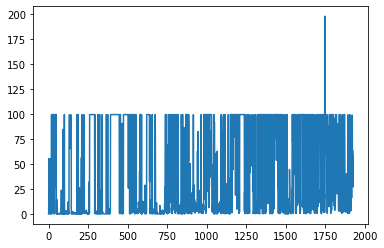

In [138]:
plt.plot(rule_five_df['f_avg_IC50']) #1926

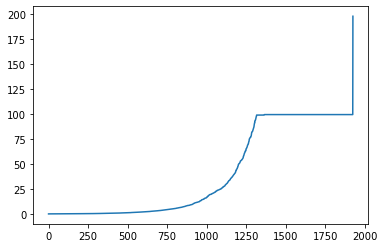

In [145]:
plt.plot(sorted(list(rule_five_df['f_avg_IC50'])))

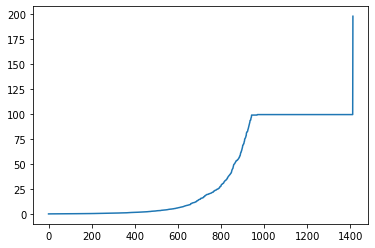

In [147]:
plt.plot(sorted(list(all_five['f_avg_IC50'])))

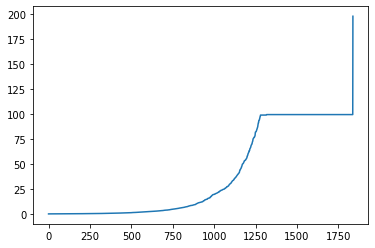

In [148]:
plt.plot(sorted(list(violate_no_more_than_one['f_avg_IC50'])))

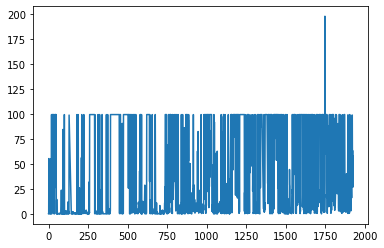

In [142]:
plt.plot(violate_no_more_than_one['f_avg_IC50'])#1839

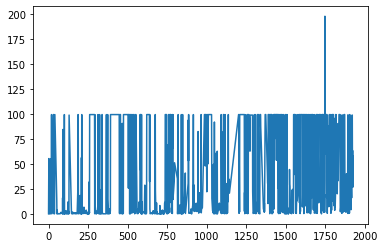

In [139]:
plt.plot(all_five['f_avg_IC50']) #1413